# Runtime Comparison of Asset Pricing Implementations

This notebook compares the execution times of various implementations (NumPy, JAX CPU, JAX GPU) of asset pricing models.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json
import os

# Define file paths
files = {
    'NumPy': 'timer_results_numpy.json',
    'JAX (CPU)': 'timer_results_jax_cpu.json',
    'JAX (GPU)': 'timer_results_jax_gpu.json'
}

# Load the timing data
results = {}
for name, filename in files.items():
    if os.path.exists(filename):
        with open(filename, 'r') as f:
            results[name] = json.load(f)
    else:
        print(f"Warning: {filename} not found.")

In [2]:
# Process Simulation Results
averages = {}

for name, data in results.items():
    if 'average' in data:
        averages[name] = data['average']
    elif 'elapsed' in data:
        # Calculate average if not explicitly provided
        averages[name] = np.mean(data['elapsed'])

# Display averages
for name, avg in averages.items():
    print(f"{name}: {avg:.4f} ms")

NumPy: 0.0014 ms
JAX (CPU): 0.0003 ms
JAX (GPU): 0.0078 ms


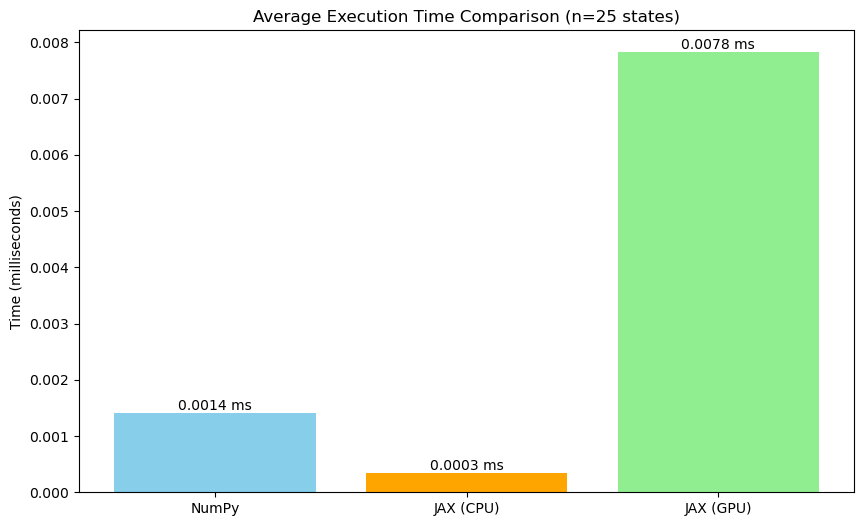

In [3]:
# Visualize Runtime Performance
if averages:
    labels = list(averages.keys())
    values = list(averages.values())

    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(labels, values, color=['skyblue', 'orange', 'lightgreen'])

    ax.set_ylabel('Time (milliseconds)')
    ax.set_title('Average Execution Time Comparison (n=25 states)')
    
    # Add labels on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f} ms', ha='center', va='bottom')

    plt.show()
else:
    print("No data available to plot.")

C:\Users\edwar\AppData\Local\Temp\ipykernel_5116\2208887528.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(plot_data, labels=plot_labels)


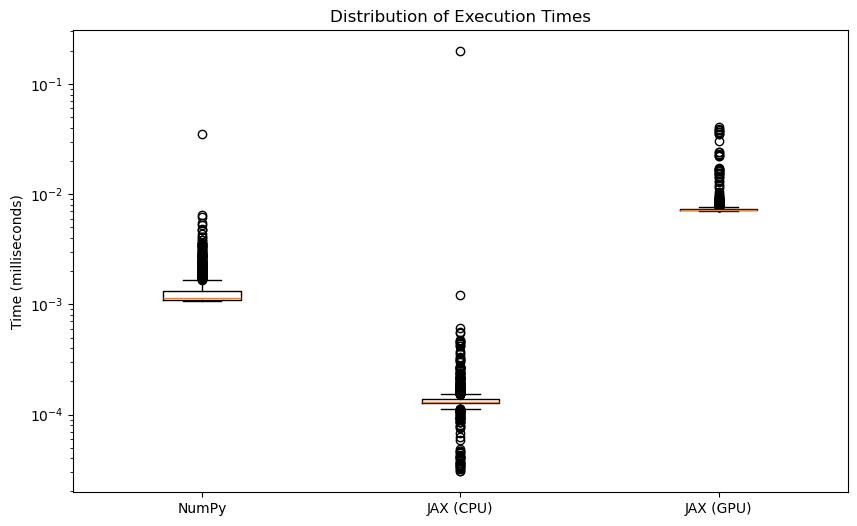

In [5]:
# Visualize Runtime Distribution with Box Plot
if results:
    plot_data = []
    plot_labels = []
    
    for name, data in results.items():
        if 'elapsed' in data:
            plot_data.append(data['elapsed'])
            plot_labels.append(name)
    
    if plot_data:
        fig, ax = plt.subplots(figsize=(10, 6))
        # Use 'labels' for broader compatibility
        ax.boxplot(plot_data, labels=plot_labels)
        ax.set_ylabel('Time (milliseconds)')
        ax.set_title('Distribution of Execution Times')
        ax.set_yscale('log')
        plt.show()
    else:
        print("No 'elapsed' time sequences available for box plots.")

In [4]:
# Calculate Performance Speedup
if 'NumPy' in averages:
    t_base = averages['NumPy']
    print("Relative Speedup (vs NumPy):")
    for name, t_opt in averages.items():
        if name != 'NumPy':
            speedup = t_base / t_opt
            print(f"- {name}: {speedup:.2f}x faster")
else:
    print("NumPy results not found to calculate speedup.")

Relative Speedup (vs NumPy):
- JAX (CPU): 4.15x faster
- JAX (GPU): 0.18x faster
